# Исследование рынка недвижимости Санкт-Петербурга

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv("C:/Users/Mi/Downloads/real_estate_data.csv", sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

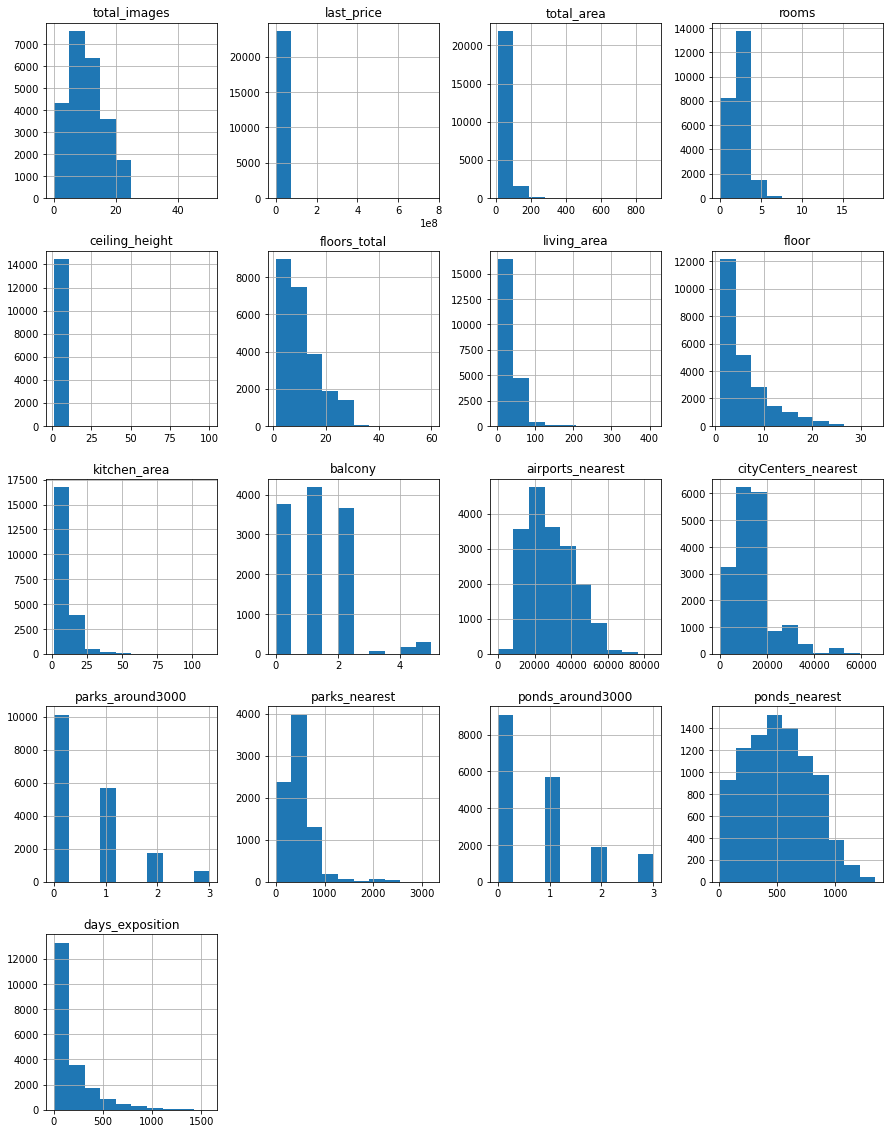

In [6]:
data.hist(figsize=(15,20));

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## Предобработка данных

### Найдем и заполним пропуски в данных

Из 22 колонок исходной таблицы, нет пропусков только в 8-ми. 

Больше всего значений пропущено по графе **is_apartment** - почти 20 тысяч записей содержат значение NaN. При этом из описания данных нам известно, что информация в этой колонке имеет булев тип, но сейчас имеет тип *object*. Пропущенные значения заменим на *False* и преобразуем тип данных и в *bool*.

Пропуски в картографических данных (колонки **airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest**) связаны, скорее всего, с ошибкой/сбоем при выгрузке из системы. Такие пропуски можно заполнить медиаными значениями, рассчитанными по населенному пункту либо по столбцу в целом. Пустые значения в колонках **parks_around3000** и **ponds_around3000** заменим на 0 и преобразуем тип данных из *float* в *int*, так как число парков и озер выражается в целых числах.

Согласно описанию, колонки **ceiling_height**, **floors_total**, **living_area**, **kitchen_area** и **balcony** заполнялись пользователями, размещавшими объявления. Поэтому и пропуски в этих колонках обусловлены, скорее всего, именно человеческим фактором. Пользователь, размещавший объявление, мог не знать точной площади квартиры и/или кухни, поэтому не стал заполнять эти поля. То же самое с общим количеством этажей в здании - пользователь либо не знал, либо счел эту информацию не существенной. Такие данные можно заменить медианным значением по населенному пункту - скорее всего в каждом населенном пукте преобладает какая-то своя типовая застройка, поэтому пропуски, заполеннные по медиане, будут корректно отражать общую картину. 
В квартирах, где не указано число балконов, их скорее всего нет. Поэтому пропуски в графе **balcony** заменим на значение 0 и преобразуем тип данных из *float* в *int*.

Отсутствие значений в колонке **days_exposition** может означать, что квартира еще не была продана на момент формирования и выгрузки данных из системы. Логически заполнить такие пропуски невозможно, поэтому их следует либо оставить без изменения, либо исключить из анализа. Их доля в общем объеме данных составляет 13,4%, что довольно существенно, поэтому удалять мы их не будем. Значения в колонке **days_exposition** так же следовало бы привести к типу *int*, но там встречаются значения *NaN*, которые мы не можем заменить без потери смысла, поэтому оставим как есть.

49 строк таблицы не имеют значений в графе **locality_name**. Логика и жизненный опыт подсказывают, что название населенного пункта является очень существенным фактором при выборе будущей квартиры, поэтому такие строки целесообразно удалить. К счастью, их доля в объем объеме данных ничножно мала (0,2%).

Для колонки **first_day_exposition** необходимо изменить тип данных с *object* на *datetime*.

In [8]:
# заполним пропуски нулями и преобразуем is_apartment в тип bool
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].astype(int)
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['last_price'].round(5)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [9]:
# проверим формат заполнения locality_name и приведем к единому формату, если это необходимо
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Среди записей в колонке **locality_name** нашлось немало неявных дубликатов. Многие записи, содержащие в себе слово *'поселок'*, существуют в двух видах - с *'ё'* или *'е'* в этом слове. Например, *'поселок Пансионат Зелёный Бор'* и *'посёлок Пансионат Зелёный Бор'*, *'поселок Кобралово'* и *'посёлок Кобралово'*, *'посёлок Лисий Нос'* и *'поселок Лисий Нос'*, и так далее.  Так же встречаются пары записей типа *'поселок Рябово'* и *'поселок городского типа Рябово'* или *'поселок Громово'* и *'поселок станции Громово'*, которые означают одни и те же населенные пункты. Целесообразно заменить любые варианты записи со словом *'посёлок'*/*'поселок'* на сокращение (например, *'пос.'*).

Так же среди уникальных записей встречается *nan* - это те 49 пропущенных значений, которые мы выявили на предыдущем шаге и которые решили отсечь.

In [10]:
# удалим строки с NaN в столбце locality_name
data = data.dropna(subset=['locality_name'])

In [11]:
# заменим все записи со словом *'посёлок'*/*'поселок'* на сокращение 'пос.'
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок', 'пос.')

In [12]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [13]:
# заполним пропуски медианными значениями по городу

for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == city), 'ceiling_height'].median()
for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == city), 'floors_total'].median()
for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['locality_name'] == city), 'living_area'].median()
for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == city), 'kitchen_area'].median()
for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == city), 'cityCenters_nearest'].median()

In [14]:
data['airports_nearest'] = data['airports_nearest'].fillna(value=data['airports_nearest'].median())
data['living_area'] = data['living_area'].fillna(value=data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['kitchen_area'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=data['cityCenters_nearest'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(value=data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=data['ponds_nearest'].median())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [16]:
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Устраним редкие и выбивающиеся значения

Пропуски и дубликаты обработаны, теперь посмотрим данные на предмет выбросов и аномалий.

Посмотрим на числовые описания данных:

In [17]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.732147,10.672304,34.053642,5.893277,10.465017,0.591712,28324.300677,14206.977674,0.469091,466.887780,0.590359,508.169302,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.002608,6.585517,21.226496,4.883317,5.631911,0.959662,11094.209978,7676.366968,0.748458,200.759193,0.883539,172.375703,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.200000,0.000000,21173.750000,10939.000000,0.000000,454.500000,0.000000,502.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.400000,4.000000,9.600000,0.000000,26756.500000,13265.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.457500,1.000000,34358.000000,15716.000000,1.000000,454.500000,1.000000,502.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Глядя на таблицу с числовыми описаниями можно выделить несколько потенциально аномальных значений:

- Минимальная стоимость квартиры (last_price) составляет 12 190 рублей - это очень сомнительное значение. Вряд ли квартира, даже в глубинке Ленинградской области, может стоить настолько дешево. Это либо ошибка, либо аномалия. Максимальная стоимость квартиры составляет 763 млн рублей, что тоже довольно много, хотя и потенциально возможно для квартиры в самом центре Санкт-Петербурга.
- Высота потолков (ceiling_height) колеблется от 1 до 100 метров. Оба значения выходят за рамки здравого смысла.
- 60 этажей в здании (floors_total) - подозрительно, но потенциально возможно. Надо посмотреть насколько это распространенные значения и, возможно, удалить как выброс.
- Общая площадь (total_area) в 900 метров тоже может быть аномалией. Равно как и жилая площадь (living_area) в 409,7 метров и кухня (kitchen_area) площадью 112 метров. Надо посмотреть на эту запись целиком, скорее всего эти параметры соответствуют одной и той же квартире.
- 19 комнат (rooms) так же выглядят подозрительно.

**Высота потолков**

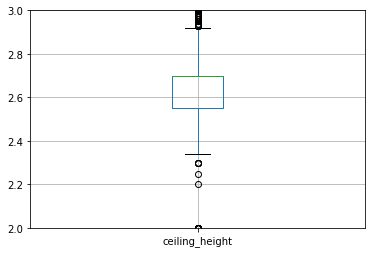

In [18]:
data.boxplot('ceiling_height')
plt.ylim(2,3);

Высота потолка в 100 метров - явная аномалия, от которой следует избавиться. График хоть и не очень из-за пропорций, но по нему все же видно, что с данных присутствуют значения, стремящиеся к нулю. Изучим перечень уникальных значений столбца **ceiling_height**.

In [19]:
data['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.52 ,   2.525,   2.53 ,   2.54 ,   2.55 ,
         2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,   2.59 ,
         2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,   2.63 ,
         2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,   2.68 ,
         2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,   2.74 ,
         2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,   2.81 ,
         2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,   2.88 ,
         2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,   2.94 ,   2.95 ,
         2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,   3.01 ,   3.02 ,
         3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,   3.08 ,   3.09 ,
         3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,   3.15 ,   3.16 ,
         3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,   3.23 ,   3.24 ,
         3.25 ,   3.

Согласно нормативам минимальная высота потолка в жилом многоквартирном доме составляет не менее 2,5 метров. В проходных помещениях (например, коридорах) высота потолка может снижаться до 2,1 метра. Максимальная высота потолков нормативными документами не оговаривается, но на практике потолок редко поднимают выше 4 метров. Таким образом, все значения меньше двух и больше 5 метров, можно считать аномальными. 

При этом значения от 20 до 32 выглядят как ошибка ввода и на самом деле это значения от 2 до 3,2 метра. Поэтому сначала все значения, превышающие 10 метров, умножим на 0,1, чтобы привести их в соответствие со здравым смыслом, а затем отсечем аномально высокие и аномально низкие значения высоты потолков.

In [20]:
filter = data['ceiling_height'] > 10
data.loc[filter, 'ceiling_height'] = data.loc[filter, 'ceiling_height'] * 0.1
data = data.query('ceiling_height < 5')
data = data.query('ceiling_height > 2')
data['ceiling_height'].sort_values().unique()

array([2.2  , 2.25 , 2.26 , 2.3  , 2.34 , 2.4  , 2.4  , 2.45 , 2.46 ,
       2.47 , 2.48 , 2.49 , 2.5  , 2.51 , 2.52 , 2.525, 2.53 , 2.54 ,
       2.55 , 2.555, 2.56 , 2.56 , 2.57 , 2.575, 2.58 , 2.59 , 2.6  ,
       2.6  , 2.61 , 2.615, 2.62 , 2.625, 2.63 , 2.64 , 2.65 , 2.65 ,
       2.66 , 2.67 , 2.675, 2.68 , 2.69 , 2.7  , 2.71 , 2.72 , 2.725,
       2.73 , 2.74 , 2.75 , 2.76 , 2.77 , 2.78 , 2.79 , 2.8  , 2.81 ,
       2.82 , 2.83 , 2.84 , 2.85 , 2.86 , 2.87 , 2.88 , 2.89 , 2.9  ,
       2.91 , 2.92 , 2.93 , 2.94 , 2.95 , 2.96 , 2.97 , 2.98 , 2.99 ,
       3.   , 3.01 , 3.02 , 3.03 , 3.04 , 3.05 , 3.06 , 3.07 , 3.08 ,
       3.09 , 3.1  , 3.11 , 3.12 , 3.13 , 3.14 , 3.15 , 3.16 , 3.17 ,
       3.18 , 3.2  , 3.21 , 3.22 , 3.23 , 3.24 , 3.25 , 3.26 , 3.27 ,
       3.28 , 3.29 , 3.3  , 3.31 , 3.32 , 3.33 , 3.34 , 3.35 , 3.36 ,
       3.37 , 3.38 , 3.39 , 3.4  , 3.42 , 3.43 , 3.44 , 3.45 , 3.46 ,
       3.47 , 3.48 , 3.49 , 3.5  , 3.51 , 3.52 , 3.53 , 3.54 , 3.55 ,
       3.56 , 3.57 ,

**Количество этажей в здании**

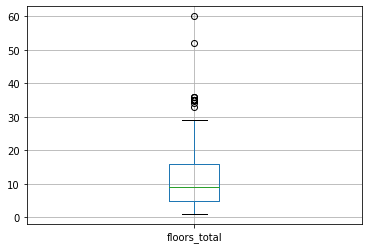

In [21]:
data.boxplot('floors_total');

На графике видны два существенных выброса в 50 и более этажей. Отбросим эти данные как редкие и потенциально аномальные.

In [22]:
data = data.query('floors_total < 50')
data.shape

(23618, 22)

**Общая площадь**

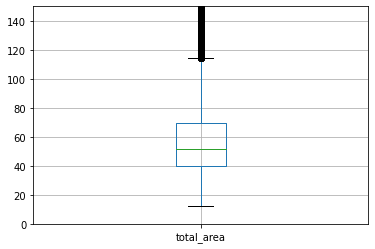

In [23]:
data.boxplot('total_area')
plt.ylim(0,150);

На графике видно, что по общей площади сильнее всего выбивается значение в 900 метров и несколько значений выше 590 метров. Исключим их все как выбросы.

In [24]:
data = data.query('total_area < 590')

**Число комнат**

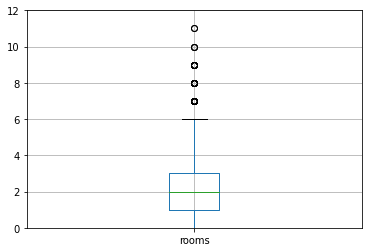

In [25]:
data.boxplot('rooms')
plt.ylim(0,12);

Судя по графику, сильнее всего выбиваются записи о квартирах, в которых более 12 комнат. Таких строк в датасете всего 5, поэтому их можно исключить из анализа.

In [26]:
data = data.query('rooms < 10')

**Стоимость квартиры**

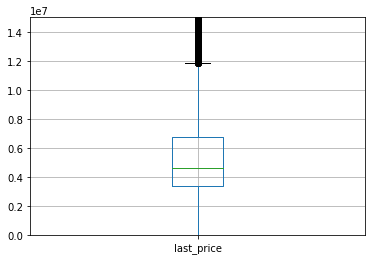

In [27]:
data.boxplot('last_price')
plt.ylim(0,15000000);

На графике видны очень крупные выбросы относительно верхней границы квантильного интервала. Следует отбросить строки с квартиры выше 300 млн руб и ниже 500 тыс руб - такой диапазон кажется корректным.

In [28]:
data = data.query('last_price < 300000000')
data = data.query('last_price > 500000')
data.shape

(23583, 22)

In [29]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23583.000000,2.358300e+04,23583.000000,23583.00000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,23583.000000,20415.000000
mean,9.863164,6.416885e+06,60.069536,2.06458,2.702734,10.677183,33.915661,5.894670,10.445470,0.592037,28329.102023,14216.057329,0.468600,466.883327,0.589916,508.332528,180.699633
std,5.679946,8.317110e+06,33.951715,1.04906,0.218997,6.570686,20.471995,4.882933,5.521381,0.959444,11102.986082,7676.003211,0.747724,200.923919,0.883059,172.383904,219.653182
min,0.000000,5.200000e+05,12.000000,0.00000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.000000,1.00000,2.550000,5.000000,19.000000,2.000000,7.200000,0.000000,21151.000000,10949.000000,0.000000,454.500000,0.000000,502.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.00000,2.700000,9.000000,30.400000,4.000000,9.600000,0.000000,26756.500000,13265.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.00000,2.700000,16.000000,41.025000,8.000000,11.400000,1.000000,34424.000000,15725.000000,1.000000,454.500000,1.000000,502.000000,231.000000
max,50.000000,2.892384e+08,517.000000,9.00000,4.900000,36.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [30]:
# проверка на наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

**Вывод**

После отсечения выбросов, аномальных значений и данных, которые нельзя восстановить, объем исходного датасета сократился всего на 0,5% (с 23699 до 23583 строк), что вписывается в допустимые пределы.

### Посчитаем и добавим в таблицу новые столбцы

Рассчитаем дополнительные параметры.

In [31]:
# расчитаем цену одного квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']
# выделим день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# переведем расстояние до центра города в километры
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000

In [32]:
# выделим тип этажа квартиры («первый», «последний», «другой»)
def categorize_floor(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'

In [33]:
data['floor_type'] = data.apply(categorize_floor, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,cityCenters_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.028,другой
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,454.5,0,502.0,81.0,82920.792079,1,12,2018,18.603,первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,13.933,другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,6.800,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.098,другой


In [34]:
# округлим расстояние до целых км
data['cityCenters_km'] = data['cityCenters_km'].round().astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,cityCenters_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,16,другой
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,454.5,0,502.0,81.0,82920.792079,1,12,2018,19,первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,14,другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,7,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,8,другой


## Исследовательский анализ данных

### Изучим параметры объектов

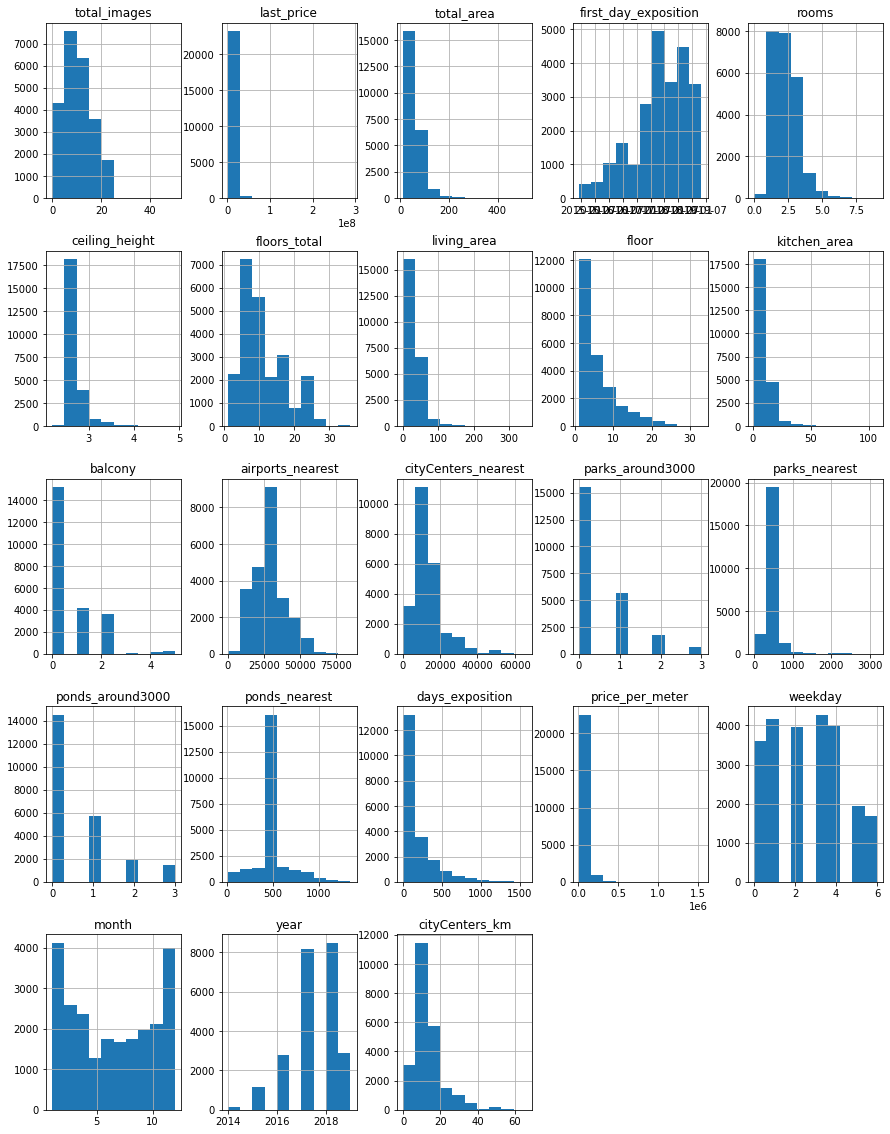

In [35]:
data.hist(figsize=(15,20));

**Общая площадь**

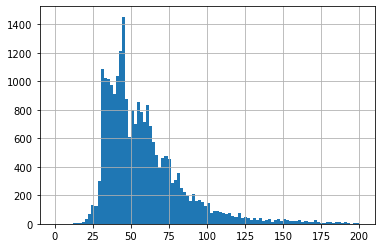

In [36]:
data['total_area'].hist(bins=100, range=(0,200));

Распределение квартир по общей площади тяготеет к нормальному, есть ярковыраженный пик в районе 50 метров квадратных. Это логично и ожидаемо, так как большинство квартир, представленных в датасете, имеют 1-2 комнаты.

**Площадь кухни**

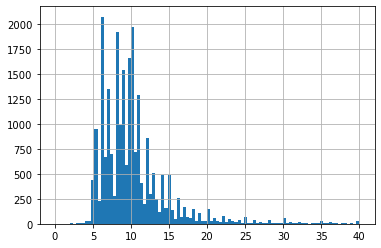

In [37]:
data['kitchen_area'].hist(bins=100, range=(0,40));

О распределении квартир по площади кухни тоже можно сказать, что оно тяготеет к нормальному. Пики в районе 5, 8 и 10 метров квадратных соответствуют площадям кухонь в домах типовой застройки.

**Жилая площадь**

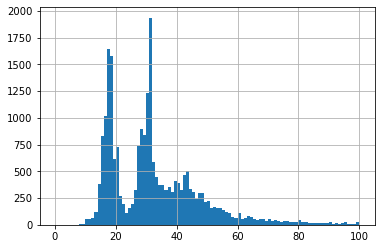

In [38]:
data['living_area'].hist(bins=100, range=(0,100));

На графике видны два больших пика около значений в 20 и 30 метров квадратных. Это соответствует ожидаемым значениям жилой площади в типовых квартирах общей площадью в 30 и 50 метров квадратных соответственно. Так же видно, что оснавная масса квартир по размеру жилой площади укладывается в диапазон до 50 метров квадратных, что соответствует площади большей части квартир в датасете. Распределение так же стремится к нормальному.

**Цена объекта**

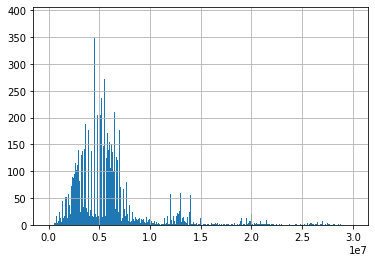

In [39]:
data['last_price'].hist(bins=1000, range=(0,30000000));

Цены на квартиры находятся преимущественно в диапазоне до 10 мнл руб и имеют нормальное распределение. Большинство квартир стоят в районе 4 млн руб.

**Количество комнат**

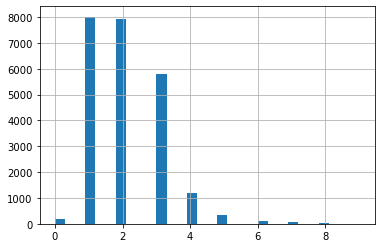

In [40]:
data['rooms'].hist(bins=30);

Как уже отмечалось ранее, чаще других на продажу выставляется одно- и двухкомнатных квартир (более половины объявлений), затем идут трехкомнатные (около 6 тыс объявлений) и совсем редко продают кввартиры с пятью и более комнатами.

**Высота потолков**

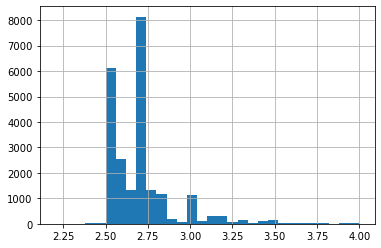

In [41]:
data['ceiling_height'].hist(bins=30, range=(2.2,4));

Высота потолков в большинстве объявлений так же укладывается в ожидаемые значения 2,5-2,7 метров. Гораздо реже встречаются квартиры с потолками 2,8-3 метра и крайне редко - с потолками выше трех метров.

**Этаж квартиры**

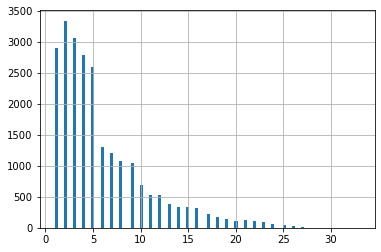

In [42]:
data['floor'].hist(bins=100);

Большинство квартир, выставленных на продажу, расположено на этажах в диапазоне с 1 по 5. При этом чаще других выставляли на продажу квартиры на 2 и 3 этажах.

**Тип этажа квартиры («первый», «последний», «другой»)**

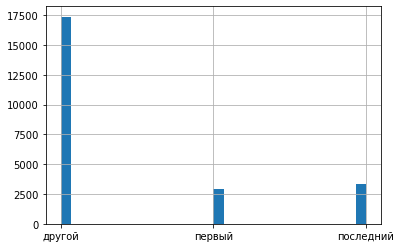

In [43]:
data['floor_type'].hist(bins=30);

Объявления о продаже квартир, расположенных на первом этаже, встречаются чуть реже, чем о продаже квартир на последнем этаже. Подавляющее большинство (~17,5 тыс) квартир, выставленных на продажу, располагается на этажах, отличных от первого и последнего.

**Общее количество этажей в доме**

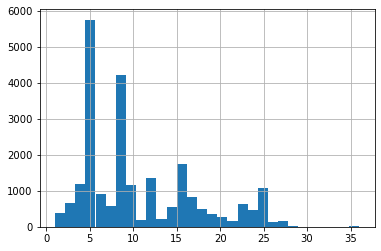

In [44]:
data['floors_total'].hist(bins=30);

Чаще всего в датасете встречаются дома, в которых 5 и 9 этажей. Это соответствует наиболее распространенной типовой застройке "советского" периода. Далее идут здания в 15 этажей, затем в 12 и 25 этажей.

**Расстояние до центра города (в метрах)**

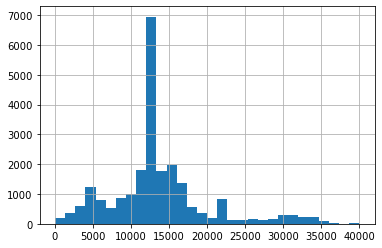

In [45]:
data['cityCenters_nearest'].hist(bins=30, range=(0,40000));

Основная масса объявлений предлагает на продажу квартиры, расположенные в более чем 10 км от центра города. Примерный диапазон 11-18 км от центра. Это, вероятно, так называемые "спальные" районы, где наиболее распространена типовая застройка пяти-девяти этажными зданиями.

**Расстояние до ближайшего аэропорта**

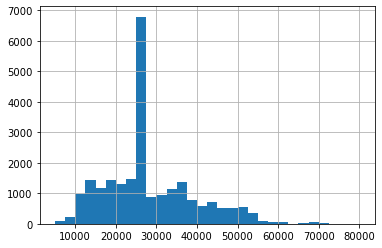

In [46]:
data['airports_nearest'].hist(bins=30, range=(5000,80000));

Чуть больше четверти квартир, представленных  в датасете, располагаются на расстоянии около 25 км до ближайшего аэропорта. Остальные квартиры относительно равномерно распределены в радиусе от 10 до 40 км.

**Расстояние до ближайшего парка**

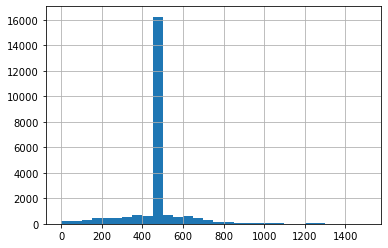

In [47]:
data['parks_nearest'].hist(bins=30, range=(0,1500));

2/3 продаваемых квартир располагается на расстоянии 500 метров от ближайшего парка.

**День и месяц публикации объявления**

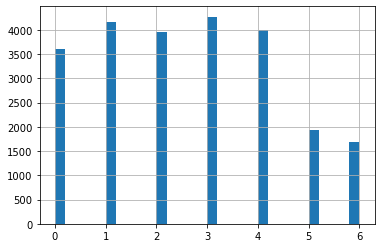

In [48]:
data['weekday'].hist(bins=30);

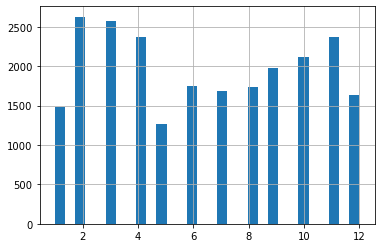

In [49]:
data['month'].hist(bins=30);

Судя по первому графику, объявления о продаже квартир выкладывают преимущественно по будним дням, в выходные это происходит существенно реже. Скорее всего, это связано с режимом работы агентств по недвижимости.

На графике по месяцам заметна некоторая сезонность: больше всего объявлений выкладывается с февраля по апрель, затем идет спад в мае и довольно ровный период летних месяцев, когда многи уезжают в отпуска или за город. Затем снова наблюдается небольшой рост с сентября по ноябрь. Реже всего объявления выкладывают в январе, мае (месяца с наибольшим числом выходных дней в году) и декабре (месяц до Нового года, когда закрывают финансовый год, проекты и пр.).

### Изучим, как быстро продавались квартиры

Построим график зависимости скорости продажи квартир от даты публикации объявлений. Так как мы не заполняли пропуски в значениях по этому столбцу (а их было более 3000), график будем строить по срезу данных без пропусков.

In [50]:
data_exp = data.query('not days_exposition.isna()').pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
data_exp.sort_values(by='days_exposition', ascending=False).head(10)

,days_exposition
first_day_exposition,
2018-02-01,355
2017-11-10,236
2017-10-13,121
2017-09-27,109
2018-07-10,88
2018-03-26,83
2017-09-28,71
2018-03-06,70
2018-01-12,67


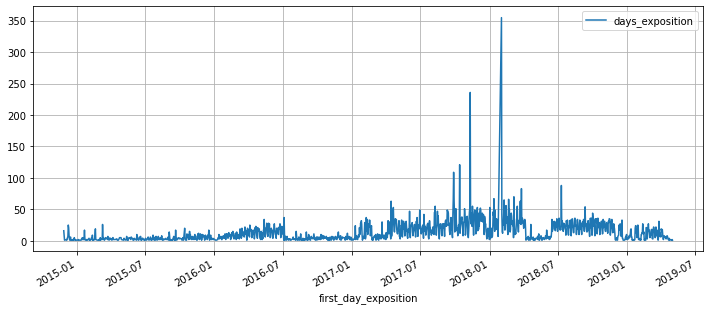

In [51]:
data_exp.plot(grid=True, figsize=(12, 5));

In [52]:
data_exp.describe()

,days_exposition
count,1471.000000
mean,13.878314
std,17.074571
min,1.000000
25%,3.000000
50%,9.000000
75%,21.000000
max,355.000000


На графике видна тенденция к росту количества объявлений к концу периода наблюдений. Это может говорить о том, что объявления были ещё актуальны (не закрыты) на момент формирования и выгрузки датасета.

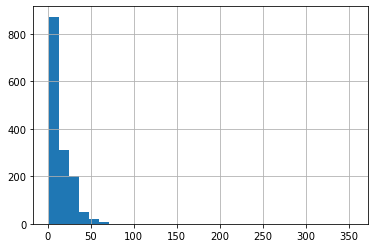

In [53]:
data_exp['days_exposition'].hist(bins=30);

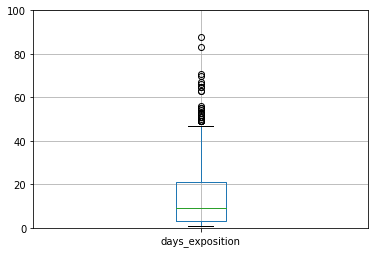

In [54]:
data_exp.boxplot('days_exposition')
plt.ylim(0,100);

На приведенных выше графиках видно, что 3/4 объявлений закрываются в течение 20 дней, а все объявления, висевшие дольше 80 дней и вовсе можно считать выбросами.

Жизненный опыт подсказывает, что нормальная квартира (адекватное соотношение цены и площади, нормальный район и дом, транспортная доступность) продается в Москве в течение ± 6 месяцев (около 180 дней). Судя по графикам, в изучаемом периоде продажи в Санкт-Петербурге и Ленинградской области совершались даже быстрее. Продажи, длящиеся дольше 100 дней, можно считать необычайно долгими и не учитывать при анализе.

,days_exposition
count,1467.000000
mean,13.356510
std,12.846575
min,1.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,88.000000


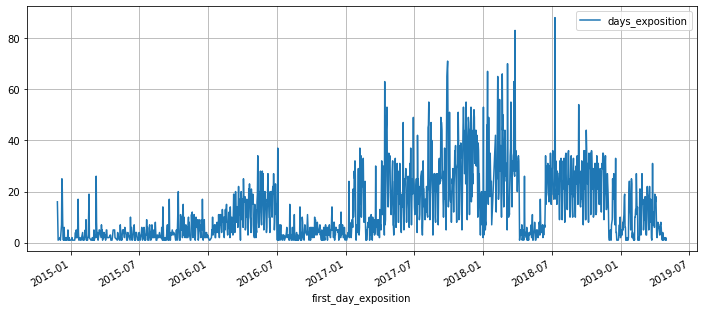

In [55]:
data_exp = data_exp.query('days_exposition < 100')
data_exp.plot(grid=True, figsize=(12, 5));
display(data_exp.describe())

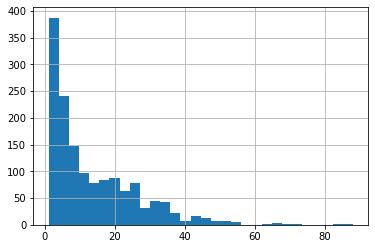

In [56]:
data_exp['days_exposition'].hist(bins=30);

В результате отсеклось всего 4 значения, а описательные характеристики для этого среза улучшились.

Большинство объявлений закрывается в срок до 50 дней, средняя продолжительность продажи квартиры составляет 14 дней, а медианная всего 9. Быстрыми можно считать продажи, длившиеся меньше недели. Быстрее всего квартиры продавались в конце 2016 года и в летние месяцы 2017 года.

### Определим какие факторы больше всего влияют на общую (полную) стоимость объекта

Изучать взаимосвязь цены квартиры с другими параметрами целесообразно на основании цены за метр квадратный, так как она нормализована по площади квартиры и лучше отражает практическую сторону дела.

Создадим отдельный датафрейм, в котором будут только анализируемые параметры:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год).

In [57]:
corr_data = data[['last_price', 'price_per_meter', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 
                  'floor_type', 'weekday', 'month', 'year', 'days_exposition', 'cityCenters_km']]
# построим матрицу корреляции
corr_data.corr()

,last_price,price_per_meter,total_area,rooms,ceiling_height,living_area,kitchen_area,weekday,month,year,days_exposition,cityCenters_km
last_price,1.000000,0.744044,0.713490,0.412999,0.362385,0.586619,0.502468,-0.002691,-0.000288,-0.052653,0.109692,-0.237370
price_per_meter,0.744044,1.000000,0.286828,0.040687,0.334525,0.193966,0.379165,-0.009470,-0.003271,0.011328,0.051899,-0.268440
total_area,0.713490,0.286828,1.000000,0.760920,0.397708,0.874094,0.556466,-0.005517,0.005388,-0.082919,0.153893,-0.222518
rooms,0.412999,0.040687,0.760920,1.000000,0.236475,0.810764,0.238862,-0.005244,-0.003500,-0.054296,0.125745,-0.173793
ceiling_height,0.362385,0.334525,0.397708,0.236475,1.000000,0.366610,0.339536,-0.018665,0.002821,-0.061394,0.109975,-0.301742
living_area,0.586619,0.193966,0.874094,0.810764,0.366610,1.000000,0.389953,-0.008485,-0.001856,-0.075361,0.144236,-0.215474
kitchen_area,0.502468,0.379165,0.556466,0.238862,0.339536,0.389953,1.000000,-0.009734,0.002835,-0.057184,0.104339,-0.162591
weekday,-0.002691,-0.009470,-0.005517,-0.005244,-0.018665,-0.008485,-0.009734,1.000000,0.011874,-0.004289,-0.024139,0.004772
month,-0.000288,-0.003271,0.005388,-0.003500,0.002821,-0.001856,0.002835,0.011874,1.000000,-0.271473,-0.029325,-0.005183
year,-0.052653,0.011328,-0.082919,-0.054296,-0.061394,-0.075361,-0.057184,-0.004289,-0.271473,1.000000,-0.611518,0.025191


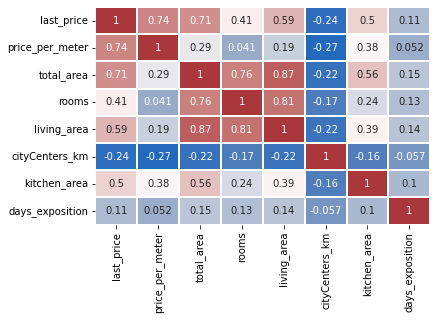

In [58]:
import seaborn as sns
sns.heatmap(corr_data[['last_price', 'price_per_meter', 'total_area', 'rooms', 'living_area', 'cityCenters_km', 'kitchen_area',
                       'days_exposition']].corr(), annot=True, cmap='vlag', cbar=False, robust=True, linewidths=.2)
plt.show()

Общая стоимость квартиры (last_price) сильнее всего коррелирует с общей площадью (total_area). Кроме того сильная корреляция наблюдается между общей площадью и жилой площадью (living_area), а так же общей площадью и числом комнат (rooms). 
При этом цена за метр квадратный (price_per_meter) ни с чем существенно не коррелирует. Это может быть обусловлено нелинейным характером связи.

Расстояние до центра города (cityCenters_km) имеет довольно слабую обратную корреляцию с ценой, то есть чем дальше квартира от центра города, тем ниже цена - как общая, так и за метр квадратный.

Рассмотрим характер зависимости цены за квадратный метр от типа этажа (первый, последний, другой).

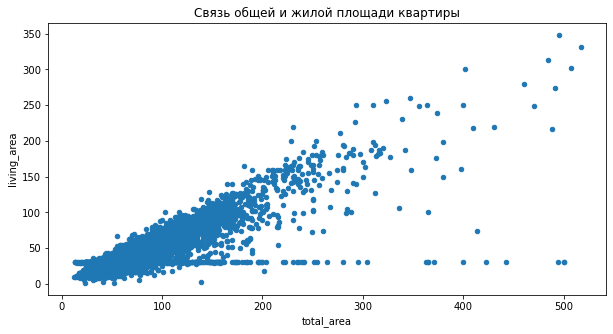

In [59]:
corr_data.plot.scatter('total_area', 'living_area', figsize=(10,5), sharex=False)
plt.title('Связь общей и жилой площади квартиры')
plt.show()

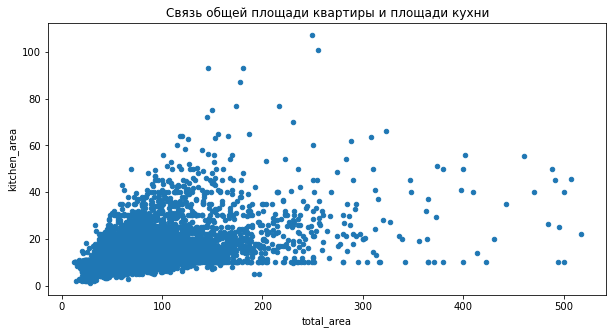

In [60]:
corr_data.plot.scatter('total_area', 'kitchen_area', figsize=(10,5), sharex=False)
plt.title('Связь общей площади квартиры и площади кухни')
plt.show()

По матрице корреляции видно, что общая площадь имеет сильную связь и со стоимостью, и с числом комнат. Попробуем это визуализировать.

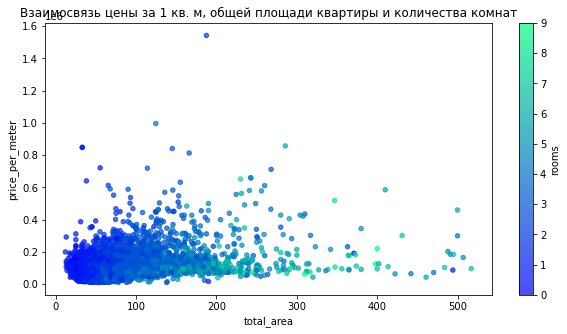

In [61]:
corr_data.plot.scatter('total_area', 'price_per_meter', figsize=(10,5), alpha=0.7, c='rooms', colormap='winter', sharex=False)
plt.title('Взаимосвязь цены за 1 кв. м, общей площади квартиры и количества комнат')
plt.show()

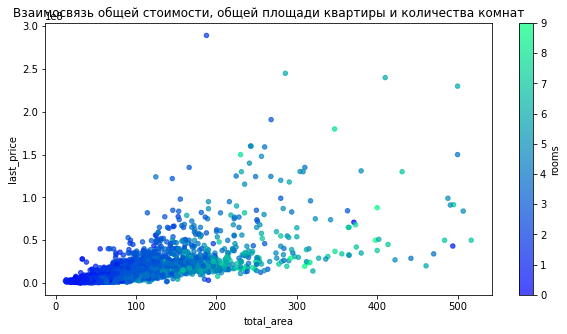

In [62]:
corr_data.plot.scatter('total_area', 'last_price', figsize=(10,5), alpha=0.7, c='rooms', colormap='winter', sharex=False)
plt.title('Взаимосвязь общей стоимости, общей площади квартиры и количества комнат')
plt.show()

Связь между общей площадью квартиры с её полной стоимостью более выражена, чем между площадью и ценой квадратного метра. Можно сказать, что с ростом площади и числа комнат, растет и общая стоимость квартиры. Что интересно, стоимоть квадратного метра может быть довольно высокой даже при небольшой площади квартиры без комнат (студии).

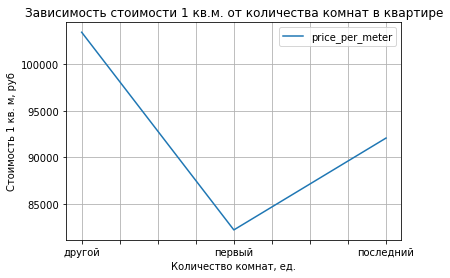

            price_per_meter
floor_type                 
другой        103424.253707
первый         82196.480197
последний      92061.353300


In [63]:
price_floor_type = corr_data.pivot_table(index='floor_type', values='price_per_meter')
price_floor_type.plot()
plt.xlabel('Количество комнат, ед.')
plt.ylabel('Стоимость 1 кв. м, руб')
plt.title('Зависимость стоимости 1 кв.м. от количества комнат в квартире')
plt.legend(loc='upper right')
plt.grid()
plt.show()
print(price_floor_type)

Самые дешевые квадратные метры находятся на первом этаже, самые дорогие - на средних. Последний этаж дороже первого, но существенно уступает в цене другим.

Рассмотрим зависимость стоимости квадратного метра от числа комнат.

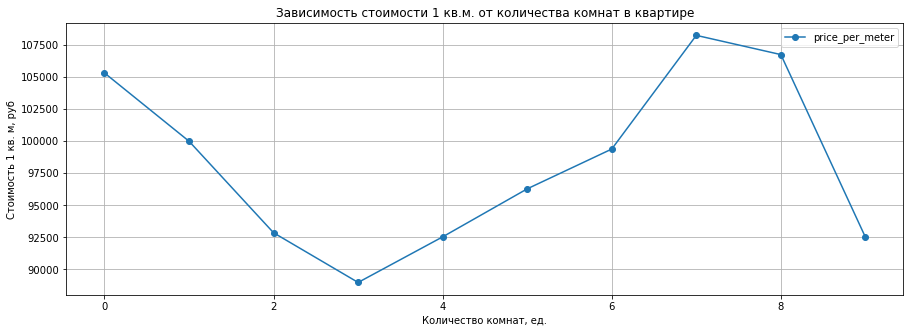

In [64]:
corr_data.pivot_table(index='rooms', values='price_per_meter', aggfunc='median').plot(style='o-', figsize=(15,5));
plt.xlabel('Количество комнат, ед.')
plt.ylabel('Стоимость 1 кв. м, руб')
plt.title('Зависимость стоимости 1 кв.м. от количества комнат в квартире')
plt.grid()
plt.show()

Зависимость явная, но не линейная - от студий к трехкомнатным квартирам стоимость кваратного метра снижается, но с увеличением количества комнат начинает растти. Вероятно, это влияние элитной недвижимости.

Рассмотрим зависимость стоимости квадратного метра от периода времени, когда было размещено объявление (дня недели, месяца, года).

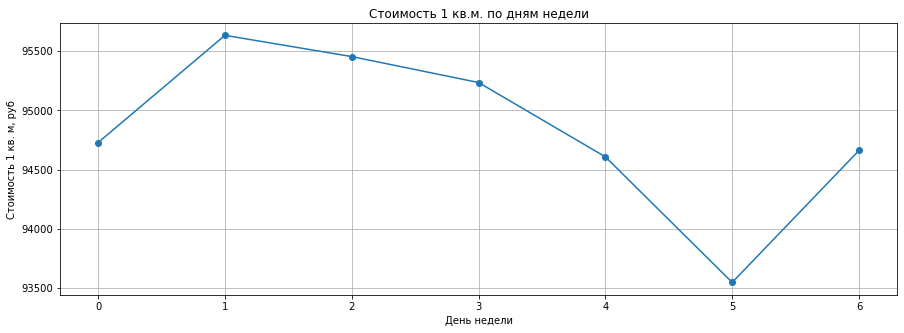

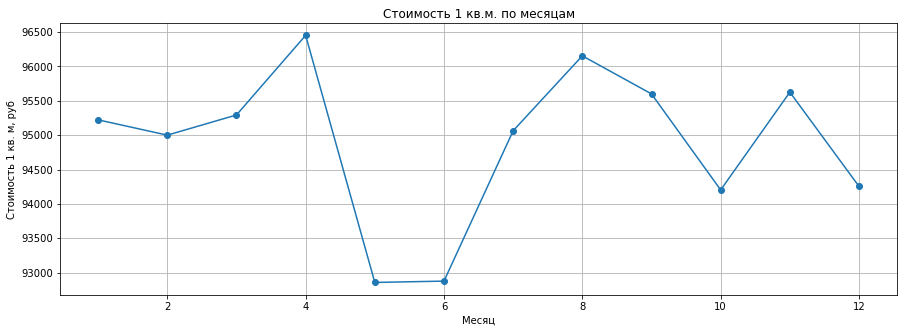

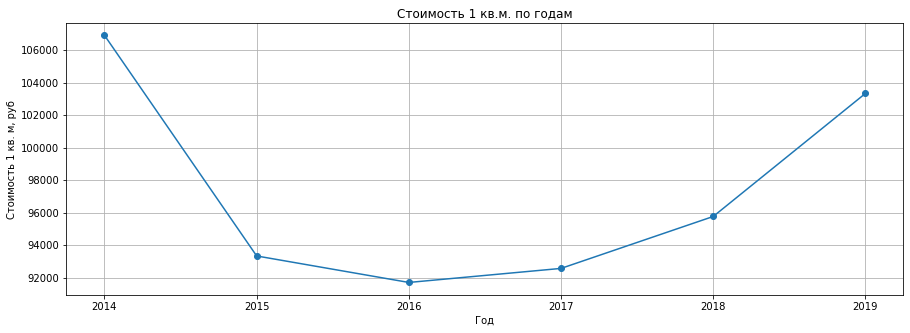

In [65]:
corr_data.groupby('weekday')['price_per_meter'].median().plot(style='o-', figsize=(15,5))
plt.xlabel('День недели')
plt.ylabel('Стоимость 1 кв. м, руб')
plt.title('Стоимость 1 кв.м. по дням недели')
plt.grid()
plt.show()

corr_data.groupby('month')['price_per_meter'].median().plot(style='o-', figsize=(15,5))
plt.xlabel('Месяц')
plt.ylabel('Стоимость 1 кв. м, руб')
plt.title('Стоимость 1 кв.м. по месяцам')
plt.grid()
plt.show()

corr_data.groupby('year')['price_per_meter'].median().plot(style='o-', figsize=(15,5))
plt.xlabel('Год')
plt.ylabel('Стоимость 1 кв. м, руб')
plt.title('Стоимость 1 кв.м. по годам')
plt.grid()
plt.show()

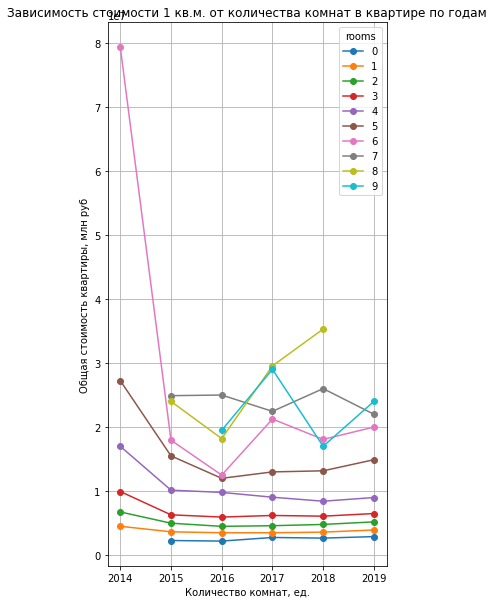

In [66]:
#corr_data.pivot_table(index='year', values='price_per_meter', columns='rooms', aggfunc='median').plot(style='o-', figsize=(10,15));
corr_data.pivot_table(index='year', values='last_price', columns='rooms', aggfunc='median').plot(style='o-', figsize=(5,10))
plt.xlabel('Количество комнат, ед.')
plt.ylabel('Общая стоимость квартиры, млн руб')
plt.title('Зависимость стоимости 1 кв.м. от количества комнат в квартире по годам')
plt.grid()
plt.show()

Зависимости стоимости квадратного метра от дня недели, когда квартира была выставлена на продажу, месяца и года практически нулевая. И всё же видна интресная динамика - стоимость квадратного метра выше всего у квартир, выставленных на продажу во вторник и плавно спадает к концу недели.

Дешевле всего квартиры продаются в мае-июне, дороже всего - в апреле и августе.

Интересно перекликаются графики длительности размещения по дате размещения, который мы строили на ранее, с графиком динамики стоимости 1 квадратного метра по годам. По ним видно, что в 2016 году, во время спада цен, и продажи совершались быстрее.

В 2015 году произошел сильный спад стоимости квадратного метра, который достиг апогея в 2016 году. Затем ситуация начала выравниваться и к 2019 году цены выросли обратно, хотя и не достигли уровня 2014 года. При этом сильнее всего колебались цены на "нестандартные" квартиры (6 комнат и более). "Стандартные" квартиры с числом комнат от 1 до 3 так же подешевели в 2015 году по сравнению с 2014 годом, но в целом стоимость таких квартир колебалась меньшею. И только студии стабильно дорожали год от года.

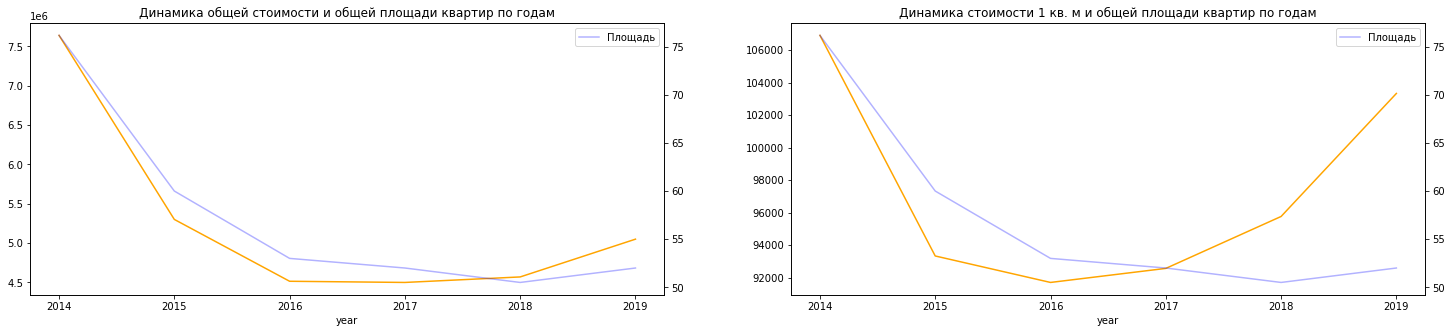

In [67]:
report = data.groupby('year').agg({'last_price': 'median',
                                   'price_per_meter': 'median',
                                  'total_area': 'median'})
plt.figure(figsize = (25,5))
ax = plt.subplot(1,2,1)

report['last_price'].plot(ax = ax, color = 'orange',  label = 'Цена')
ax2 = ax.twinx()

report['total_area'].plot(ax = ax2, color = 'blue', alpha = 0.3, label = 'Площадь')
plt.legend()
plt.title('Динамика общей стоимости и общей площади квартир по годам');

ax = plt.subplot(1,2,2)
report['price_per_meter'].plot(ax = ax, color = 'orange',  label = 'Цена')
ax2 = ax.twinx()
report['total_area'].plot(ax = ax2, color = 'blue', alpha = 0.3, label = 'Площадь')
plt.legend()
plt.title('Динамика стоимости 1 кв. м и общей площади квартир по годам');

На графиках видно, что падение стоимости квартир в 2015 году обусловлено уменьшением площади выставляемых на продажу квартир. 

Причем после 2016 года стоимость одного квадратного метра снова начала расти, несмотря на то, что общая площадь продаваемых квартир продолжала падать.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [68]:
(
    data.groupby('locality_name').agg({'total_images': 'count', 'price_per_meter': 'mean'})\
    .rename(columns={'total_images': 'Число объявлений'})\
    .sort_values(by='Число объявлений', ascending=False).head(10)
)

,Число объявлений,price_per_meter
locality_name,,
Санкт-Петербург,15685,114429.989992
пос. Мурино,556,85681.762601
пос. Шушары,440,78677.364217
Всеволожск,397,68719.320400
Пушкин,369,103125.819291
Колпино,338,75424.579098
пос. Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


In [69]:
(
    data.groupby('locality_name').agg({'total_images': 'count', 'price_per_meter': 'mean'})\
    .rename(columns={'total_images': 'Число объявлений'})\
    .sort_values(by='price_per_meter', ascending=False).head(10)
)

,Число объявлений,price_per_meter
locality_name,,
Зеленогорск,24,115122.799198
Санкт-Петербург,15685,114429.989992
деревня Бор,1,105539.261570
пос. Репино,4,104238.614786
Пушкин,369,103125.819291
Сестрорецк,183,101757.616875
пос. Лисий Нос,3,100660.814239
Кудрово,172,100285.114241
деревня Мистолово,11,98549.976709


Лидером по числу объявлений о продаже квартир ожидаемо оказался Санкт-Петербург. При этом по стоимости одного квадратного метра он только на втором месте, на первом - город Зеленогорск. Средняя стоимость квадратного метра в Санкт-Петербурге за период 2014-2019гг. составляла 114 430 руб/кв.м, а в Зеленогорске - 115 123 руб/кв.м.

Наименьшая средняя стоимость квадратного метра в наблюдаемом периоде была зафиксирована в городе Выборг - 58 238 руб/кв.м.

### Вычислим среднюю цену каждого километра до центра Санкт-Петербурга

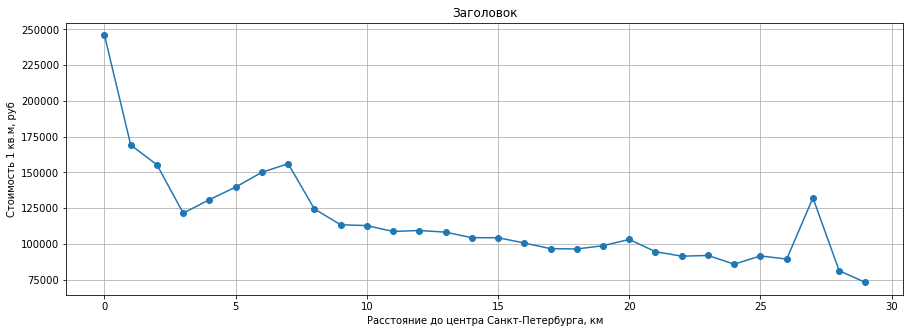

In [70]:
data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_km')['price_per_meter'].agg('mean').plot(style='o-', figsize=(15,5))
plt.ticklabel_format(style='plain')
plt.xlabel('Расстояние до центра Санкт-Петербурга, км')
plt.ylabel('Стоимость 1 кв.м, руб')
plt.grid()
plt.title('Заголовок')
plt.show()

Самая дорогая недвижимость Санкт-Петербурга распологается в самом его центре и стоит почти 250 тыс рублей за квадратный метр. 

По мере отдаления от центра стоимость квадратного метра снижается - на расстоянии от 1 до 7 км от центра города цена одного квадратного метра колеблется между 125 тыс и 175 тыс рублей, а на расстоянии более 10 км уже редко превышает отметку в 125 тыс рублей.

Ранее мы уже находили слабую отрицательную корреляцию между стоимостью квартиры и расстоянием до центра города. Приведенный выше график её подтверждает - видно, что чем ближе к центру, тем выше стоимость квадратного метра.

## Общий вывод

**Описание проекта:** 

Получен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 года, выгруженный из сервиса Яндекс.Недвижимость. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Задача:** найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

На первом этапе была проведена **предобработка данных:**
 - обработаны пропущенные значения;
 - выявлены и обработаны неявные дубликаты;
 - выявлены и отсечены выбросы и аномальные значения (0,5% от объема исходного датасета).

Часть некорректных и пропущенных значений в датасете, скорее всего, являются ошибками ввода. Пропуски в картографических данных связаны, скорее всего, с ошибкой/сбоем при выгрузке из системы.

На втором этапе был проведен **исследовательский анализ данных**, в ходе которого определены следующие закономерности.

  1. Чаще всего выставляют на продажу одно- и двухкомнатные квартиры общей площадью около 50 квадратных метров (типовая застройка), расположенные на средних этажах домов (не первый и не последний) и на расстоянии 10 км и более от центра города.
    
  2. Последний этаж продается дороже первого, но уступает в цене квартирам, расположенным на других этажах.
  
  3. Дешевле всего квартиры продаются в мае-июне, дороже всего - в апреле и августе.
  
  4. Большинство объявлений закрывается в срок до двух месяцев (50 дней). Средняя продолжительность продажи квартиры составляет две недели, но встречаются продажи, длившиеся меньше недели.
  
  5. Общая стоимость квартиры сильнее всего коррелирует с её общей площадью - чем больше площадь квартиры, тем выше её стоимость. Общая площадь квартиры напрямую связана с числом комнат, а число комнат имеет связь с ценой одного квадратного метра. Можно сказать, что с ростом площади и числа комнат, растет и общая стоимость квартиры.
  
  6. Чем дальше квартира от центра города, тем ниже её цена (как общая, так и за квадратный метр). Например, Самая дорогая недвижимость Санкт-Петербурга распологается в самом его центре (до 1 км) и стоит почти 250 тыс рублей за квадратный метр. По мере отдаления от центра стоимость квадратного метра снижается - на расстоянии от 1 до 7 км от центра города цена одного квадратного метра колеблется между 125 тыс и 175 тыс рублей, а на расстоянии более 10 км уже редко превышает отметку в 125 тыс рублей.

  7. Стоимость квартир с числом комнат от 1 до 3 меньше подвержена колебаниям. Цены на студии стабильно растут год от года.
  
  8. В 2015 году произошел сильный спад стоимости продаваемых квартир. Это падение обусловлено уменьшением площади квартир, выставляемых на продажу. При этом стоимость одного квадратного метра почти сразу снова пошла в рост, несмотря на продолжавшееся падение общей площади продаваемых квартир.
  
В дальнейшем для оценки рыночной стоимости квартиры целесообразно учитывать и такие факторы, как транспортная доступность (расстояние до метро или других транспортных узлов), материал и год постройки дома, наличие лифта.